## Simple Linear Regression with Python

### 1. Import modules

In [95]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 2. Create dataset

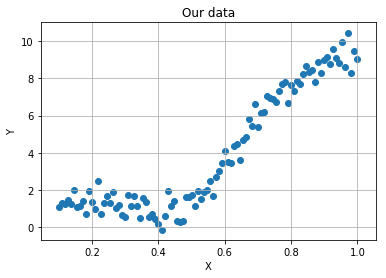

In [96]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100, 1)
data_x /= np.max(data_x)
plt.scatter(data_x, data_y); plt.title('Our data'); plt.xlabel('X'); plt.ylabel('Y')
plt.grid('On')

num_epochs = 1000
step_size = 1e-3

### 3. Perform gradient descent

In [97]:
print("Inputs shape: {0}".format(data_x.shape))
print("Labels shape: {0}".format(data_y.shape))

Inputs shape: (100, 1)
Labels shape: (100, 1)


#### Define loss function

In [98]:
def compute_grad_loss(x, y, w):
    y_estimate = np.dot(x, w)
    # Estimate using squared loss function.
    loss = np.power(y_estimate - y, 2).mean()
    grad_loss = 2 * x.T.dot((y_estimate - y))

    return loss, grad_loss

In [99]:
print("Initializing weights randomly....")
weights = np.random.random((1, 1))
print("Weights shape {0}".format(weights.shape))
print("")

for epoch in range(num_epochs):
    loss, grad_loss = compute_grad_loss(data_x, data_y, weights)

    # Update weights using gradient.
    # weights = weights - step_size * grad_loss
    weights -= step_size * grad_loss

    if epoch % 100 == 0:
        print('Epoch: %d - Loss: %.4f' % (epoch, loss))


Initializing weights randomly....
Weights shape (1, 1)

Epoch: 0 - Loss: 21.3548
Epoch: 100 - Loss: 2.6693
Epoch: 200 - Loss: 2.6693
Epoch: 300 - Loss: 2.6693
Epoch: 400 - Loss: 2.6693
Epoch: 500 - Loss: 2.6693
Epoch: 600 - Loss: 2.6693
Epoch: 700 - Loss: 2.6693
Epoch: 800 - Loss: 2.6693
Epoch: 900 - Loss: 2.6693


#### Plotting results.

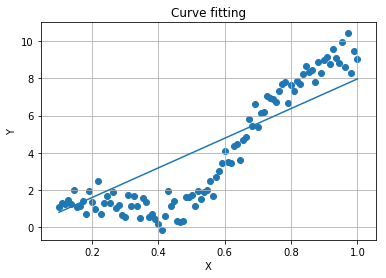

In [100]:
plt.scatter(data_x, data_y)
plt.plot(data_x, np.multiply(data_x, weights)); plt.grid('On')
plt.title('Curve fitting'); plt.xlabel('X'); plt.ylabel('Y');

### 4. Higher dimensional weights

**First issue:** Our weights vector has two dimensions. Our inputs has one dimensional feature vector. Because we cannot include additional information to our feature vector, one solution is to stack a column of ones to our vector.

In [101]:
# Stack new input.
data_x = np.hstack((np.ones_like(data_x), data_x))
print("New data shape {0}".format(data_x.shape))

New data shape (100, 2)


In [102]:
print("Initializing weights randomly....")
weights = np.random.random((2, 1))
print("Weights shape {0}".format(weights.shape))
print("")

for epoch in range(num_epochs):
    loss, grad_loss = compute_grad_loss(data_x, data_y, weights)
    weights -= step_size * grad_loss

    if epoch % 200 == 0:
        print('Epoch: %d - Loss: %.4f' % (epoch, loss))

Initializing weights randomly....
Weights shape (2, 1)

Epoch: 0 - Loss: 18.0211
Epoch: 200 - Loss: 1.8927
Epoch: 400 - Loss: 1.8069
Epoch: 600 - Loss: 1.8056
Epoch: 800 - Loss: 1.8056


### 4. Plot curve.

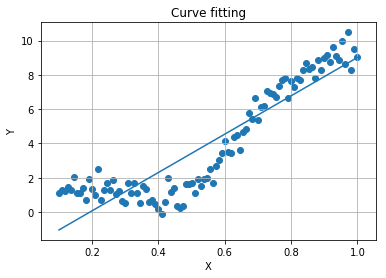

In [103]:
plt.scatter(data_x[:, 1], data_y[:, 0])
plt.plot(data_x[:, 1], data_x.dot(weights)[:, 0]); plt.grid('On')
plt.title('Curve fitting'); plt.xlabel('X'); plt.ylabel('Y');